In [1]:
import matplotlib.pyplot as plt
import networkx as nx


Durée totale du projet : 7 jours
Chemin critique :
Définition des besoins (7 jours)
Choix techno Équipe 2 (7 jours)
Dév pipeline Équipe 2 (21 jours)
Dév modèle (14 jours)
Intégration (14 jours)
Tests (7 jours)
Documentation (7 jours)
Présentation finale (7 jours)
Le graphe est acyclique.


In [4]:
from dataclasses import dataclass
import networkx as nx

@dataclass
class Task:
    name: str
    duration: int

def compute_total_duration(G):
    try:
        total_duration = nx.dag_longest_path_length(G, weight='duration')
        return total_duration
    except nx.NetworkXUnfeasible:
        print("Le graphe contient un cycle. Veuillez corriger les dépendances.")
        return None

def find_critical_path(G):
    try:
        critical_path = nx.dag_longest_path(G, weight='duration')
        return critical_path
    except nx.NetworkXUnfeasible:
        print("Le graphe contient un cycle. Impossible de trouver le chemin critique.")
        return None

# Définition des tâches avec leurs durées
tasks = {
    'T1': Task('Définition des besoins', 7),
    'T2': Task('Choix techno Équipe 1', 7),
    'T3': Task('Choix techno Équipe 2', 7),
    'T4': Task('Dév pipeline Équipe 1', 21),
    'T5': Task('Dév pipeline Équipe 2', 21),
    'T6': Task('Dév modèle', 14),
    'T7': Task('Dév application', 14),
    'T8': Task('Intégration', 14),
    'T9': Task('Tests', 7),
    'T10': Task('Documentation', 7),
    'T11': Task('Présentation finale', 7),
}

# Création du graphe des tâches
G = nx.DiGraph()

# Ajout des nœuds avec les attributs
for task_id, task in tasks.items():
    G.add_node(task_id, name=task.name, duration=task.duration)

# Ajout des arcs (dépendances)
G.add_edge('T1', 'T2')
G.add_edge('T1', 'T3')
G.add_edge('T2', 'T4')
G.add_edge('T3', 'T5')
G.add_edge('T4', 'T8')
G.add_edge('T5', 'T6')
G.add_edge('T5', 'T7')
G.add_edge('T6', 'T8')
G.add_edge('T7', 'T8')
G.add_edge('T8', 'T9')
G.add_edge('T9', 'T10')
G.add_edge('T10', 'T11')

# Calcul de la durée totale du projet
total_duration = compute_total_duration(G)
print(f"Durée totale du projet : {total_duration} jours")

# Trouver le chemin critique
critical_path = find_critical_path(G)
print("Chemin critique :")
for task_id in critical_path:
    task = tasks[task_id]
    print(f"{task.name} ({task.duration} jours)")

# Vérification de cycles
if nx.is_directed_acyclic_graph(G):
    print("Le graphe est acyclique.")
else:
    print("Le graphe contient un cycle.")


Durée totale du projet : 7 jours
Chemin critique :
Définition des besoins (7 jours)
Choix techno Équipe 2 (7 jours)
Dév pipeline Équipe 2 (21 jours)
Dév modèle (14 jours)
Intégration (14 jours)
Tests (7 jours)
Documentation (7 jours)
Présentation finale (7 jours)
Le graphe est acyclique.


KeyError: 'duration'

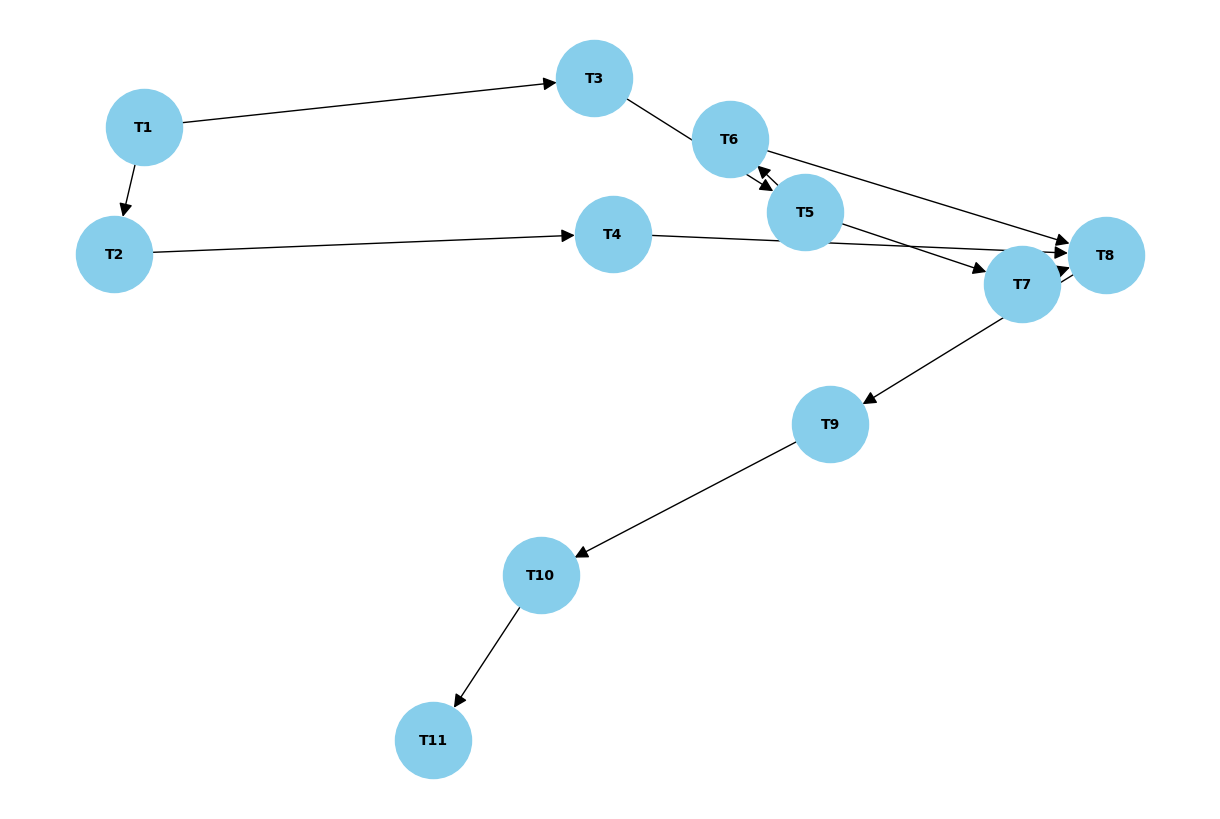

In [5]:
# Affichage du graphe
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['duration'] for u, v in G.edges}, font_color='red')
plt.show()
